#Primero, importamos las librerías necesarias para realizar el EDA.

In [ ]:
%%capture
!pip install missingno

import pandas as pd
df = pd.read_csv('veterinary_clinical_data.csv')

import seaborn as sns
import numpy as np
import plotly as pl
import missingno as msno
import matplotlib.pyplot as plt


#Creamos una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc

In [ ]:
veterinary_data_df=df.copy()

#Se cambia el tipo de datos de cada columna si es necesario.

In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnimalName      10000 non-null  object 
 1   Breed           10000 non-null  object 
 2   Age             10000 non-null  float64
 3   Weight_kg       10000 non-null  float64
 4   MedicalHistory  10000 non-null  object 
 5   Symptom_1       10000 non-null  object 
 6   Symptom_2       10000 non-null  object 
 7   Symptom_3       10000 non-null  object 
 8   Symptom_4       10000 non-null  object 
 9   Symptom_5       10000 non-null  object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB
None
  AnimalName          Breed   Age  Weight_kg    MedicalHistory Symptom_1  \
0        Dog     Rottweiler   6.0       32.1   Chronic illness  Anorexia   
1        Dog        Bulldog   9.9       18.5        Vaccinated  Lethargy   
2        Dog         Beagle  13.9       18.9  Parasite history   

Se observa que no hay valores nulos en este dataset.

###Todas las columnas que aparecen como object se cambian a string.

In [ ]:
for col in veterinary_data_df.columns:
  if veterinary_data_df[col].dtype == 'object':
    veterinary_data_df[col] = veterinary_data_df[col].astype('string')


#Se comprueba que se ha cambiado
print(veterinary_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnimalName      10000 non-null  string 
 1   Breed           10000 non-null  string 
 2   Age             10000 non-null  float64
 3   Weight_kg       10000 non-null  float64
 4   MedicalHistory  10000 non-null  string 
 5   Symptom_1       10000 non-null  string 
 6   Symptom_2       10000 non-null  string 
 7   Symptom_3       10000 non-null  string 
 8   Symptom_4       10000 non-null  string 
 9   Symptom_5       10000 non-null  string 
dtypes: float64(2), string(8)
memory usage: 781.4 KB
None


###Nos aseguramos que los datos de tipo "str" no tengan espacios innecesarios y que estén escritas en minúsculas.

In [ ]:
def clean_text(s):
  return s.astype(str).str.strip().str.lower()

for col in veterinary_data_df.columns:
  if veterinary_data_df[col].dtype == 'string':
    veterinary_data_df[col] = clean_text(veterinary_data_df[col])

#Para comprobar que se produce el cambio
print(veterinary_data_df.head())

  AnimalName          Breed   Age  Weight_kg    MedicalHistory Symptom_1  \
0        dog     rottweiler   6.0       32.1   chronic illness  anorexia   
1        dog        bulldog   9.9       18.5        vaccinated  lethargy   
2        dog         beagle  13.9       18.9  parasite history      pain   
3        cat  scottish fold   5.8        6.3    recent surgery  vomiting   
4        cat        persian  11.2        4.9    recent surgery    severe   

     Symptom_2             Symptom_3 Symptom_4               Symptom_5  
0  hydrophobia         drooping ears  diarrhea   shyness or aggression  
1     weakness          horny growth     fever                coughing  
2  weight loss           weight loss  sneezing  drop on egg production  
3         pain    edema in lower jaw      pain                weakness  
4  weight loss  egg production stops  weakness     poor body condition  


#Hacemos distintos gráficos para tener una visión completa de los datos

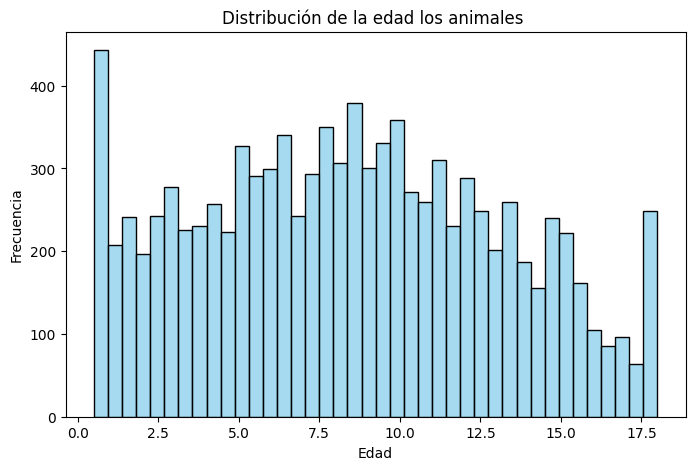

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(veterinary_data_df['Age'], bins=40, kde=False, color='skyblue')
plt.title("Distribución de la edad los animales ")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

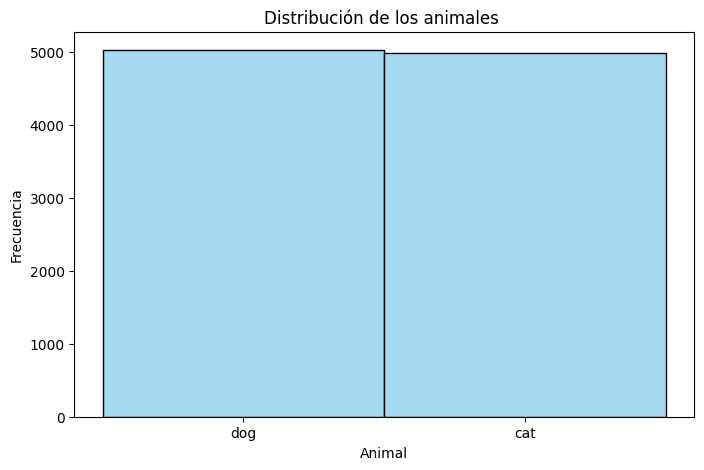

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(veterinary_data_df['AnimalName'], bins=40, kde=False, color='skyblue')
plt.title("Distribución de los animales ")
plt.xlabel("Animal")
plt.ylabel("Frecuencia")
plt.show()

Se observa que solamente hay datos de perros y gatos y que la cantidad de cada uno es aproximadamente la misma.

# Se dividen en grupos:
**Graves:** son síntomas ante los que hay que buscar ayuda inmediata para que el animal no muera.

**Medios:** son síntomas que hay que tener en cuenta y llevar al veterinario en cuanto se pueda. No hay peligro de muerte.

**Leves:** son síntomas que no implican un riesgo de muerte ni gran preocupación. Solo observar su duración y si hay otros síntomas.

In [ ]:
#Se filtrarán por síntomas graves, medios y leves:
sintomas_cols = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']
graves = ['fever', 'diarrhea', 'ulcerated ear', 'dyspnea', 'dehydration', 'cough']
medios = ['vomiting', 'yellow eyes']
leves = ['lethargia', 'loss of appetite']
filtro_graves = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in graves), axis=1)
df_filtrado_graves = df.loc[filtro_graves, sintomas_cols]
#print(df_filtrado_graves)
filtro_medios = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in medios), axis=1)
df_filtrado_medios = df.loc[filtro_medios, sintomas_cols]
#print(df_filtrado_medios)
#filtro_leves = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in leves), axis=1)
#df_filtrado_leves = df.loc[filtro_leves, sintomas_cols]
#print(df_filtrado_leves)


In [ ]:
#Se filtrarán por enfermedades:
sintomas_cols = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']

rabia = ['Hydrophobia','Shyness or aggression']
filtro_rabia = df[sintomas_cols].apply(lambda fila: all(s in fila.values for s in rabia), axis=1)
df_filtrado_rabia = df.loc[filtro_rabia, sintomas_cols]
#print(df_filtrado_rabia)

prob_hepaticos = ['Yellow Eye']
filtro_prob_hepaticos = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in prob_hepaticos), axis=1)
df_filtrado_prob_hepaticos = df.loc[filtro_prob_hepaticos, sintomas_cols]
#print(df_filtrado_prob_hepaticos)


#filtro_leves = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in leves), axis=1)
#df_filtrado_leves = df.loc[filtro_leves, sintomas_cols]
#print(df_filtrado_leves)


#Diagrama de cajas y bigotes
##### Haremos diagramas para ver si hay outliers al dividir los perros y los gatos por perro según su peso.

Primero filtraremos por gatos y perros y sus razas.

In [ ]:
# Filtrar gatos
gatos = df[df['AnimalName'] == 'cat']

# Filtrar perros
perros = df[df['AnimalName'] == 'Dog']

# Si quieres ver las razas únicas de cada grupo:
razas_gatos = gatos['Breed'].unique()
razas_perros = perros['Breed'].unique()

print("Razas de gatos:", razas_gatos)
print("Razas de perros:", razas_perros)

Razas de gatos: ['Scottish Fold' 'Persian' 'Maine Coon' 'Bengal' 'British Shorthair'
 'Ragdoll' 'Siamese' 'Mixed Breed' 'Sphynx']
Razas de perros: ['Rottweiler' 'Bulldog' 'Beagle' 'Mixed Breed' 'Boxer' 'Yorkshire Terrier'
 'Golden Retriever' 'Poodle' 'German Shepherd' 'Labrador Retriever']


Text(0.5, 1.0, 'Box Plot de perros y gatos por peso.')

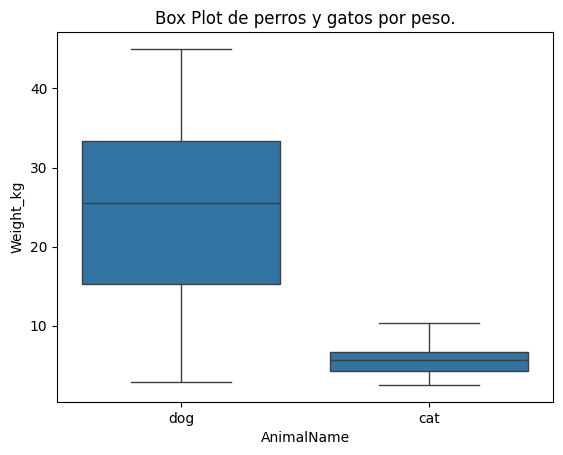

In [ ]:
#Para hacer boxplot
ax= sns.boxplot(data=veterinary_data_df, x='AnimalName', y='Weight_kg')
ax.set_title('Box Plot de perros y gatos por peso.')

Aquí queremos hacer un boxplot donde se vean las razas de perros o gatos por peso, pero separando la de los perros y gatos, no todas juntas.

Text(0.5, 1.0, 'Box Plot de razas de gatos por peso.')

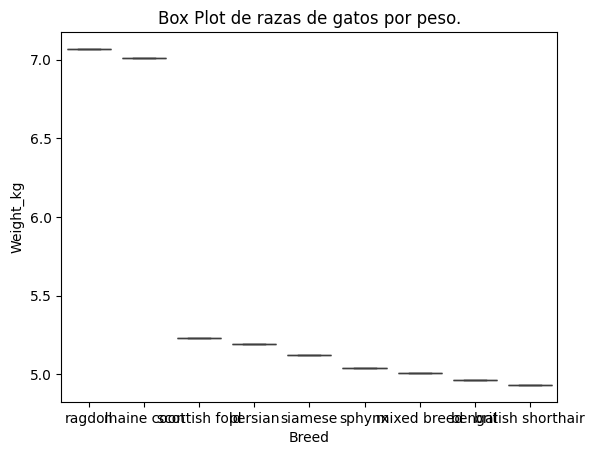

In [ ]:
ax= sns.boxplot(data=peso_gatos, x='Breed', y='Weight_kg')
ax.set_title('Box Plot de razas de gatos por peso.')

/tmp/ipython-input-2426308872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peso_por_raza, x='Breed', y='Weight_kg', palette='pastel')


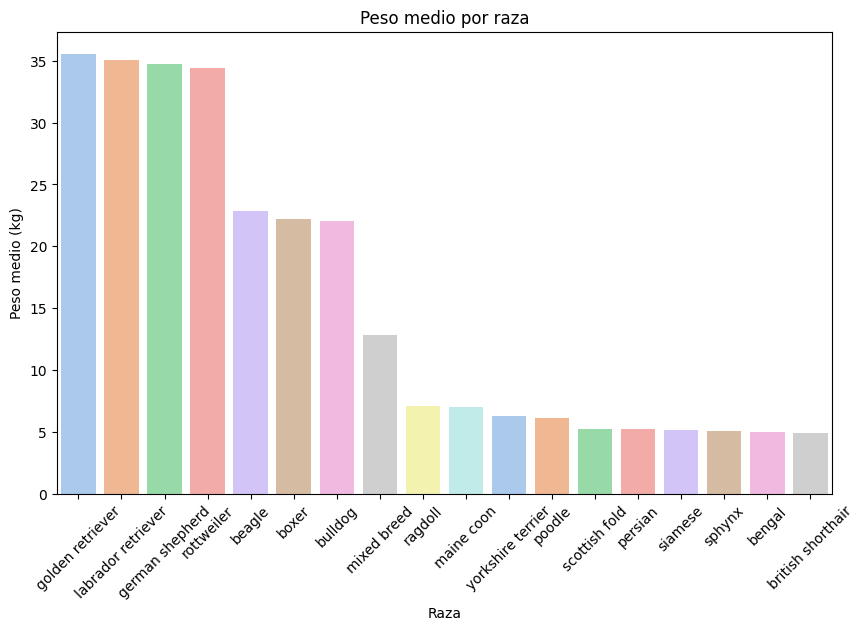

In [ ]:
# Gráfico de barras de perros y gatos
plt.figure(figsize=(10,6))
sns.barplot(data=peso_por_raza, x='Breed', y='Weight_kg', palette='pastel')

plt.title("Peso medio por raza")
plt.xlabel("Raza")
plt.ylabel("Peso medio (kg)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1118770535.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peso_gatos, x='Breed', y='Weight_kg', palette='pastel', ax=axes[0])
/tmp/ipython-input-1118770535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peso_perros, x='Breed', y='Weight_kg', palette='muted', ax=axes[1])


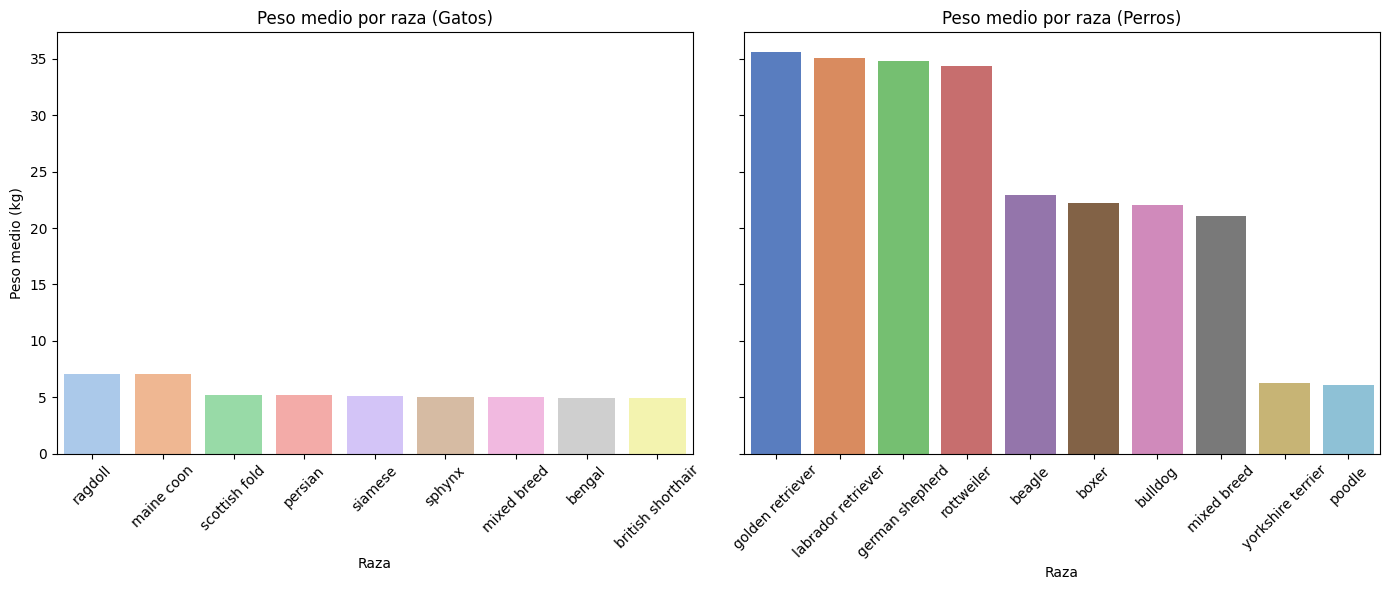

In [ ]:
# Agrupar por raza y calcular el peso medio
peso_por_raza = veterinary_data_df.groupby(['AnimalName','Breed'])['Weight_kg'].mean().reset_index()

#Separar gatos y perros
peso_gatos = peso_por_raza[peso_por_raza['AnimalName'] == 'cat'].sort_values(by='Weight_kg', ascending=False)
peso_perros = peso_por_raza[peso_por_raza['AnimalName'] == 'dog'].sort_values(by='Weight_kg', ascending=False)

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Gráfico de gatos
sns.barplot(data=peso_gatos, x='Breed', y='Weight_kg', palette='pastel', ax=axes[0])
axes[0].set_title("Peso medio por raza (Gatos)")
axes[0].set_xlabel("Raza")
axes[0].set_ylabel("Peso medio (kg)")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de perros
sns.barplot(data=peso_perros, x='Breed', y='Weight_kg', palette='muted', ax=axes[1])
axes[1].set_title("Peso medio por raza (Perros)")
axes[1].set_xlabel("Raza")
axes[1].set_ylabel("Peso medio (kg)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()